<a href="https://colab.research.google.com/github/danishrauf46/Object_Recognition_using_RESNET50/blob/main/Object_Recognition_using_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

 99% 708M/715M [00:11<00:00, 57.8MB/s]
100% 715M/715M [00:11<00:00, 63.5MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Dataset is extracted')

Dataset is extracted


In [5]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 15.7 MB/s eta 0:00:00


In [6]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [8]:
filenames = os.listdir('/content/train')

In [9]:
len(filenames)

50000

In [10]:
df = pd.read_csv('/content/trainLabels.csv')

In [11]:
df.shape

(50000, 2)

In [12]:
df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [13]:
df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [14]:
df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [15]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = [labels_dictionary[i] for i in df['label']]

In [16]:
print(labels[0:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


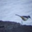

In [17]:
import cv2
from google.colab.patches import cv2_imshow


img = cv2.imread('/content/train/49996.png')
cv2_imshow(img)

In [18]:
list = list(df['id'])

In [19]:
print(list[0:5])


[1, 2, 3, 4, 5]


In [20]:
training_folder = '/content/train/'

data_list = []

for id in list:

  image = Image.open(training_folder + str(id) + '.png')
  image = np.array(image)
  data_list.append(image)

In [21]:
x = np.array(data_list)
y = np.array(labels)

In [22]:
type(x)


numpy.ndarray

In [23]:
type(y)

numpy.ndarray

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [25]:
print(x.shape, x_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3) (10000,)


In [26]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [27]:
x_train_scaled

array([[[[0.07058824, 0.07058824, 0.06666667],
         [0.08627451, 0.09019608, 0.0745098 ],
         [0.14509804, 0.14901961, 0.12941176],
         ...,
         [0.75686275, 0.84313725, 0.89411765],
         [0.74117647, 0.82352941, 0.8745098 ],
         [0.74901961, 0.83529412, 0.88627451]],

        [[0.09019608, 0.09803922, 0.08235294],
         [0.10196078, 0.10588235, 0.08235294],
         [0.1254902 , 0.12156863, 0.09019608],
         ...,
         [0.47058824, 0.56470588, 0.50196078],
         [0.41568627, 0.50980392, 0.44705882],
         [0.47843137, 0.57254902, 0.50980392]],

        [[0.09411765, 0.11764706, 0.08627451],
         [0.09019608, 0.09019608, 0.05882353],
         [0.16470588, 0.14901961, 0.11372549],
         ...,
         [0.33333333, 0.41568627, 0.25490196],
         [0.33333333, 0.41568627, 0.25490196],
         [0.3372549 , 0.41960784, 0.25882353]],

        ...,

        [[0.70196078, 0.58431373, 0.46666667],
         [0.69019608, 0.56862745, 0.45490196]

In [28]:
x_test_scaled

array([[[[0.22352941, 0.24705882, 0.2627451 ],
         [0.24313725, 0.27843137, 0.30588235],
         [0.23137255, 0.27058824, 0.30196078],
         ...,
         [0.23529412, 0.25490196, 0.29019608],
         [0.24705882, 0.27058824, 0.28627451],
         [0.24313725, 0.26666667, 0.27843137]],

        [[0.23137255, 0.25490196, 0.27843137],
         [0.29411765, 0.34117647, 0.38039216],
         [0.2745098 , 0.32941176, 0.36862745],
         ...,
         [0.25882353, 0.29019608, 0.3254902 ],
         [0.29803922, 0.33333333, 0.35294118],
         [0.28235294, 0.31764706, 0.33333333]],

        [[0.23529412, 0.25882353, 0.27843137],
         [0.29019608, 0.3372549 , 0.38039216],
         [0.25882353, 0.30588235, 0.34901961],
         ...,
         [0.29019608, 0.34117647, 0.36470588],
         [0.38431373, 0.40392157, 0.41568627],
         [0.4       , 0.41176471, 0.43529412]],

        ...,

        [[0.22745098, 0.25490196, 0.2627451 ],
         [0.2627451 , 0.30588235, 0.34901961]

In [29]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [30]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [31]:
model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 446s 366ms/step - accuracy: 0.3866 - loss: 1.8061 - val_accuracy: 0.4349 - val_loss: 1.6834
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 395s 363ms/step - accuracy: 0.6614 - loss: 1.0037 - val_accuracy: 0.6431 - val_loss: 1.0135
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 399s 380ms/step - accuracy: 0.7373 - loss: 0.8015 - val_accuracy: 0.6802 - val_loss: 0.9125
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 382s 380ms/step - accuracy: 0.7725 - loss: 0.6917 - val_accuracy: 0.7079 - val_loss: 0.8499
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 364s 362ms/step - accuracy: 0.8078 - loss: 0.5976 - val_accuracy: 0.7544 - val_loss: 0.7401


In [34]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)
print('Test Loss = ', loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - accuracy: 0.7529 - loss: 0.7357
Test Accuracy = 0.7541000247001648
Test Loss =  0.7368198037147522


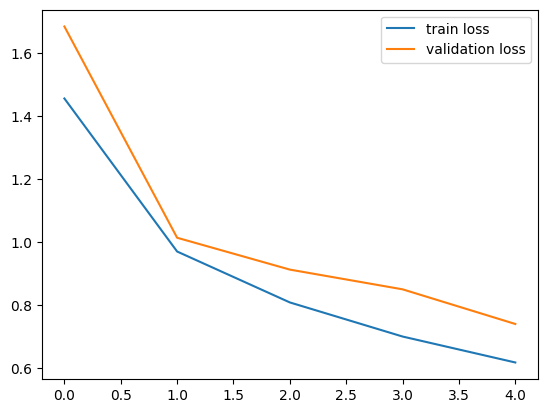

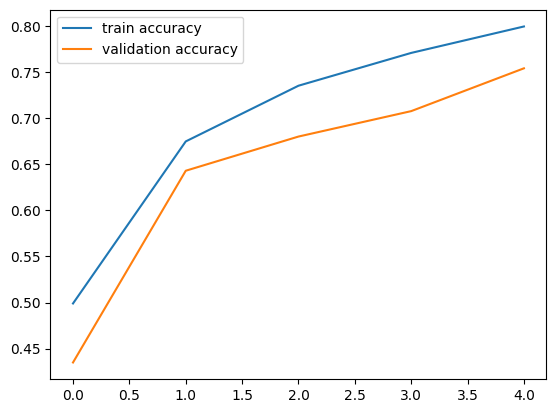

In [35]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()